In [1]:
import pandas as pd
import os


In [2]:
COMBINED_DATA = os.path.join('..', 'data', 'combined-data.csv')


In [3]:
songs_df = pd.read_csv(COMBINED_DATA)
songs_df.head()


,Year,Artist,Title,URL,TrackId,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,...,Speechiness,Tempo,Time Signature,Valence,Album,Image,Explicit,Popularity,Preview,Winner
0,1958,Domenico Modugno,Nel Blu Dipinto Di Blu (Volare),https://open.spotify.com/track/006Ndmw2hHxvnLb...,006Ndmw2hHxvnLbJsBFnPx,0.987,0.518,216373.0,0.060,0.000008,...,0.0441,127.870,4.0,0.336,Tutto Modugno (Mister Volare),https://i.scdn.co/image/5e8c49f7a8d161c1d65109...,False,34.0,https://p.scdn.co/mp3-preview/a0e2ef35a1613d86...,1
1,1958,Henry Mancini,The Music From Peter Gunn,https://open.spotify.com/track/3BdPP6Xce6FUcfa...,3BdPP6Xce6FUcfaCFsnZIg,0.893,0.550,177733.0,0.318,0.881000,...,0.0313,138.037,4.0,0.620,The music from Peter Gunn,https://i.scdn.co/image/1ad2e8ce1f988c27678298...,False,16.0,https://p.scdn.co/mp3-preview/8380c4830866fc12...,1
2,1958,"Domenico Modugno, songwriter (Domenico Modugno)",Nel Blu Dipinto Di Blu (Volare),https://open.spotify.com/track/006Ndmw2hHxvnLb...,006Ndmw2hHxvnLbJsBFnPx,0.987,0.518,216373.0,0.060,0.000008,...,0.0441,127.870,4.0,0.336,Tutto Modugno (Mister Volare),https://i.scdn.co/image/5e8c49f7a8d161c1d65109...,False,34.0,https://p.scdn.co/mp3-preview/a0e2ef35a1613d86...,1
3,1958,Perry Como,Catch A Falling Star,https://open.spotify.com/track/38YMdelhj62vJ6d...,38YMdelhj62vJ6d5a0wxMQ,0.864,0.628,148493.0,0.172,0.000000,...,0.0600,118.895,3.0,0.475,It's Impossible,https://i.scdn.co/image/0a33dd0dbd1b416c245c8c...,False,44.0,https://p.scdn.co/mp3-preview/9e2cfff3559c2e26...,1
4,1958,The Champs,Tequila,https://open.spotify.com/track/5gJKsGij5oGt5H5...,5gJKsGij5oGt5H5RSFYXPa,0.121,0.671,135240.0,0.742,0.679000,...,0.0441,89.748,4.0,0.897,Greatest Hits / Tequila,https://i.scdn.co/image/f969d6a06169034bc57193...,False,58.0,https://p.scdn.co/mp3-preview/2c88f827c751d5e5...,1


In [4]:
songs_df = songs_df.sample(frac=1).reset_index(drop=True)

In [5]:
songs_df.columns


Index(['Year', 'Artist', 'Title', 'URL', 'TrackId', 'Acousticness',
       'Danceability', 'Duration (ms)', 'Energy', 'Instrumentalness', 'Key',
       'Liveness', 'Loudness', 'Mode', 'Speechiness', 'Tempo',
       'Time Signature', 'Valence', 'Album', 'Image', 'Explicit', 'Popularity',
       'Preview', 'Winner'],
      dtype='object')

In [6]:
X = songs_df.drop(labels=['Artist', 'Title', 'URL', 'TrackId', 'Album', 'Image', 'Winner', 'Preview'], axis=1)
X = X[['Year', 'Acousticness', 'Danceability', 'Duration (ms)', 'Energy',
       'Instrumentalness', 'Key', 'Liveness', 'Loudness', 'Mode',
       'Speechiness', 'Tempo', 'Time Signature', 'Valence', 'Explicit',
       'Popularity']]
X.head()


,Year,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Explicit,Popularity
0,2016,0.00427,0.762,232093.0,0.6660,0.000000,0.0,0.127,-6.055,1.0,0.0916,118.970,4.0,0.278,True,69.0
1,1974,0.00878,0.504,386707.0,0.7190,0.001490,1.0,0.075,-9.155,0.0,0.0431,102.144,4.0,0.177,False,63.0
2,2017,0.85400,0.210,185080.0,0.0959,0.003550,5.0,0.261,-17.767,1.0,0.0347,175.914,3.0,0.167,False,53.0
3,1974,0.25500,0.488,296133.0,0.4930,0.000181,2.0,0.102,-9.878,1.0,0.0464,135.093,4.0,0.389,False,50.0
4,2006,0.04060,0.353,287560.0,0.5720,0.000000,11.0,0.967,-6.878,1.0,0.0362,176.086,4.0,0.133,False,40.0


In [7]:
X.dtypes


Year                  int64
Acousticness        float64
Danceability        float64
Duration (ms)       float64
Energy              float64
Instrumentalness    float64
Key                 float64
Liveness            float64
Loudness            float64
Mode                float64
Speechiness         float64
Tempo               float64
Time Signature      float64
Valence             float64
Explicit               bool
Popularity          float64
dtype: object

In [8]:
X['Explicit'] = X.Explicit.astype(int)
X['Year'] = X.Explicit.astype(int)

In [9]:
X.Explicit.value_counts()


0    8285
1     606
Name: Explicit, dtype: int64

In [10]:
excluded_features = ['Year', 'Key']
X.drop(labels=excluded_features, axis=1, inplace=True)


In [11]:
y = songs_df['Winner']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Winner, dtype: int64

In [12]:
y.value_counts()

0    6729
1    2162
Name: Winner, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)


X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.3, random_state=1, stratify=y_train)

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_val_scaled = X_scaler.transform(X_val)

# Convert labels to one-hot-encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_val_categorical = to_categorical(y_val)

Using TensorFlow backend.
/Users/kishore/Tools/anaconda3/envs/PythonStuff/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/kishore/Tools/anaconda3/envs/PythonStuff/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/Users/kishore/Tools/anaconda3/envs/PythonStuff/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/Users/kishore/Tools/anaconda3/envs/PythonStuff/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del s

In [14]:
X.shape

(8891, 14)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

dims = len(X.columns)
# Create model and add layers
def make_model(dense_layer_sizes, activation, optimizer):
    model = Sequential()
    for dense_layer in dense_layer_sizes:
        model.add(Dense(units=dense_layer, activation=activation, input_dim=dims))
        
    model.add(Dense(units=2, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
dense_size_candidates = [[120, 120]]
classifier = KerasClassifier(make_model)
validator = GridSearchCV(classifier,
                         param_grid={'dense_layer_sizes': dense_size_candidates,
                                     'epochs': [250],
                                     'activation': ['relu'],
                                     'optimizer': ['adam'],
                                    }, n_jobs=1)
validator.fit(X_train_scaled, y_train_categorical, validation_data=(X_val, y_val_categorical), batch_size=200)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/Users/kishore/Tools/anaconda3/envs/PythonStuff/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Train on 2904 samples, validate on 1867 samples
Epoch 1/250
2904/2904 [==============================] - 0s 101us/step - loss: 0.5564 - acc: 0.7683 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 2/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.4965 - acc: 0.7920 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 3/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.4866 - acc: 0.7948 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 4/250
2904/2904 [==============================] - 0s 15us/step - loss: 0.4775 - acc: 0.8017 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 5/250
2904/2904 [==============================] - 0s 13us/step - loss: 0.4722 - acc: 0.8030 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 6/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.4673 - acc: 0.8051 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 7/250
2904/2904 [==============================] - 0s 16us/step - loss: 0.4618 - acc: 0.8051 - val_loss: 12.1986 - val_acc: 

2904/2904 [==============================] - 0s 12us/step - loss: 0.2815 - acc: 0.8953 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 61/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.2678 - acc: 0.9056 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 62/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.2602 - acc: 0.9043 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 63/250
2904/2904 [==============================] - 0s 13us/step - loss: 0.2618 - acc: 0.9001 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 64/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.2564 - acc: 0.9053 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 65/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.2541 - acc: 0.9087 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 66/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.2554 - acc: 0.9036 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 67/250
2904/2904 [=======================

2904/2904 [==============================] - 0s 12us/step - loss: 0.1244 - acc: 0.9638 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 120/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.1196 - acc: 0.9669 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 121/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.1205 - acc: 0.9666 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 122/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.1226 - acc: 0.9652 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 123/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.1207 - acc: 0.9649 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 124/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.1166 - acc: 0.9690 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 125/250
2904/2904 [==============================] - 0s 13us/step - loss: 0.1135 - acc: 0.9707 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 126/250
2904/2904 [================

2904/2904 [==============================] - 0s 11us/step - loss: 0.0594 - acc: 0.9883 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 179/250
2904/2904 [==============================] - 0s 13us/step - loss: 0.0572 - acc: 0.9904 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 180/250
2904/2904 [==============================] - 0s 13us/step - loss: 0.0594 - acc: 0.9897 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 181/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.0571 - acc: 0.9873 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 182/250
2904/2904 [==============================] - 0s 13us/step - loss: 0.0552 - acc: 0.9921 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 183/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.0556 - acc: 0.9900 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 184/250
2904/2904 [==============================] - 0s 13us/step - loss: 0.0550 - acc: 0.9917 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 185/250
2904/2904 [================

2904/2904 [==============================] - 0s 16us/step - loss: 0.0287 - acc: 0.9976 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 238/250
2904/2904 [==============================] - 0s 15us/step - loss: 0.0279 - acc: 0.9976 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 239/250
2904/2904 [==============================] - 0s 16us/step - loss: 0.0293 - acc: 0.9969 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 240/250
2904/2904 [==============================] - 0s 18us/step - loss: 0.0287 - acc: 0.9979 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 241/250
2904/2904 [==============================] - 0s 15us/step - loss: 0.0278 - acc: 0.9972 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 242/250
2904/2904 [==============================] - 0s 17us/step - loss: 0.0268 - acc: 0.9972 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 243/250
2904/2904 [==============================] - 0s 15us/step - loss: 0.0254 - acc: 0.9979 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 244/250
2904/2904 [================

2904/2904 [==============================] - 0s 14us/step - loss: 0.3147 - acc: 0.8729 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 46/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.3114 - acc: 0.8722 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 47/250
2904/2904 [==============================] - 0s 13us/step - loss: 0.3076 - acc: 0.8771 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 48/250
2904/2904 [==============================] - 0s 11us/step - loss: 0.3023 - acc: 0.8812 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 49/250
2904/2904 [==============================] - 0s 13us/step - loss: 0.3028 - acc: 0.8764 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 50/250
2904/2904 [==============================] - 0s 13us/step - loss: 0.3046 - acc: 0.8771 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 51/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.2969 - acc: 0.8853 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 52/250
2904/2904 [=======================

2904/2904 [==============================] - 0s 14us/step - loss: 0.1536 - acc: 0.9552 - val_loss: 12.1900 - val_acc: 0.2437
Epoch 105/250
2904/2904 [==============================] - 0s 15us/step - loss: 0.1511 - acc: 0.9508 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 106/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.1487 - acc: 0.9549 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 107/250
2904/2904 [==============================] - 0s 15us/step - loss: 0.1463 - acc: 0.9552 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 108/250
2904/2904 [==============================] - 0s 13us/step - loss: 0.1451 - acc: 0.9573 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 109/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.1433 - acc: 0.9566 - val_loss: 12.1814 - val_acc: 0.2442
Epoch 110/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.1428 - acc: 0.9563 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 111/250
2904/2904 [==================

2904/2904 [==============================] - 0s 16us/step - loss: 0.0674 - acc: 0.9886 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 164/250
2904/2904 [==============================] - 0s 17us/step - loss: 0.0689 - acc: 0.9831 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 165/250
2904/2904 [==============================] - 0s 19us/step - loss: 0.0708 - acc: 0.9835 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 166/250
2904/2904 [==============================] - 0s 15us/step - loss: 0.0678 - acc: 0.9862 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 167/250
2904/2904 [==============================] - 0s 15us/step - loss: 0.0651 - acc: 0.9873 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 168/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.0657 - acc: 0.9866 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 169/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.0626 - acc: 0.9886 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 170/250
2904/2904 [=====================

2904/2904 [==============================] - 0s 15us/step - loss: 0.0349 - acc: 0.9952 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 223/250
2904/2904 [==============================] - 0s 13us/step - loss: 0.0317 - acc: 0.9979 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 224/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.0315 - acc: 0.9983 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 225/250
2904/2904 [==============================] - 0s 15us/step - loss: 0.0302 - acc: 0.9983 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 226/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.0292 - acc: 0.9979 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 227/250
2904/2904 [==============================] - 0s 14us/step - loss: 0.0303 - acc: 0.9979 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 228/250
2904/2904 [==============================] - 0s 15us/step - loss: 0.0292 - acc: 0.9986 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 229/250
2904/2904 [=======================

2904/2904 [==============================] - 0s 13us/step - loss: 0.3594 - acc: 0.8495 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 31/250
2904/2904 [==============================] - 0s 11us/step - loss: 0.3558 - acc: 0.8495 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 32/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.3530 - acc: 0.8492 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 33/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.3492 - acc: 0.8502 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 34/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.3477 - acc: 0.8561 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 35/250
2904/2904 [==============================] - 0s 11us/step - loss: 0.3438 - acc: 0.8564 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 36/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.3382 - acc: 0.8571 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 37/250
2904/2904 [=======================

2904/2904 [==============================] - 0s 11us/step - loss: 0.1795 - acc: 0.9360 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 90/250
2904/2904 [==============================] - 0s 11us/step - loss: 0.1752 - acc: 0.9439 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 91/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.1718 - acc: 0.9439 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 92/250
2904/2904 [==============================] - 0s 11us/step - loss: 0.1725 - acc: 0.9463 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 93/250
2904/2904 [==============================] - 0s 11us/step - loss: 0.1724 - acc: 0.9408 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 94/250
2904/2904 [==============================] - 0s 11us/step - loss: 0.1668 - acc: 0.9466 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 95/250
2904/2904 [==============================] - 0s 11us/step - loss: 0.1663 - acc: 0.9477 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 96/250
2904/2904 [=======================

2904/2904 [==============================] - 0s 11us/step - loss: 0.0835 - acc: 0.9783 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 149/250
2904/2904 [==============================] - 0s 11us/step - loss: 0.0808 - acc: 0.9814 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 150/250
2904/2904 [==============================] - 0s 11us/step - loss: 0.0798 - acc: 0.9811 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 151/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.0792 - acc: 0.9824 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 152/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.0771 - acc: 0.9838 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 153/250
2904/2904 [==============================] - 0s 11us/step - loss: 0.0768 - acc: 0.9838 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 154/250
2904/2904 [==============================] - 0s 12us/step - loss: 0.0747 - acc: 0.9835 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 155/250
2904/2904 [================

2904/2904 [==============================] - 0s 18us/step - loss: 0.0397 - acc: 0.9948 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 208/250
2904/2904 [==============================] - 0s 18us/step - loss: 0.0400 - acc: 0.9948 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 209/250
2904/2904 [==============================] - 0s 16us/step - loss: 0.0368 - acc: 0.9955 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 210/250
2904/2904 [==============================] - 0s 17us/step - loss: 0.0363 - acc: 0.9969 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 211/250
2904/2904 [==============================] - 0s 18us/step - loss: 0.0364 - acc: 0.9962 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 212/250
2904/2904 [==============================] - 0s 18us/step - loss: 0.0391 - acc: 0.9928 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 213/250
2904/2904 [==============================] - 0s 15us/step - loss: 0.0366 - acc: 0.9972 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 214/250
2904/2904 [================

4356/4356 [==============================] - 0s 13us/step - loss: 0.4216 - acc: 0.8182 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 16/250
4356/4356 [==============================] - 0s 12us/step - loss: 0.4188 - acc: 0.8177 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 17/250
4356/4356 [==============================] - 0s 13us/step - loss: 0.4156 - acc: 0.8184 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 18/250
4356/4356 [==============================] - 0s 12us/step - loss: 0.4107 - acc: 0.8214 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 19/250
4356/4356 [==============================] - 0s 12us/step - loss: 0.4088 - acc: 0.8196 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 20/250
4356/4356 [==============================] - 0s 11us/step - loss: 0.4068 - acc: 0.8216 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 21/250
4356/4356 [==============================] - 0s 12us/step - loss: 0.4012 - acc: 0.8244 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 22/250
4356/4356 [=======================

4356/4356 [==============================] - 0s 13us/step - loss: 0.2442 - acc: 0.9125 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 75/250
4356/4356 [==============================] - 0s 12us/step - loss: 0.2393 - acc: 0.9098 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 76/250
4356/4356 [==============================] - 0s 14us/step - loss: 0.2365 - acc: 0.9125 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 77/250
4356/4356 [==============================] - 0s 13us/step - loss: 0.2386 - acc: 0.9086 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 78/250
4356/4356 [==============================] - 0s 11us/step - loss: 0.2319 - acc: 0.9160 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 79/250
4356/4356 [==============================] - 0s 12us/step - loss: 0.2392 - acc: 0.9082 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 80/250
4356/4356 [==============================] - 0s 13us/step - loss: 0.2323 - acc: 0.9121 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 81/250
4356/4356 [=========================

4356/4356 [==============================] - 0s 12us/step - loss: 0.1274 - acc: 0.9619 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 134/250
4356/4356 [==============================] - 0s 13us/step - loss: 0.1307 - acc: 0.9637 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 135/250
4356/4356 [==============================] - 0s 12us/step - loss: 0.1327 - acc: 0.9591 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 136/250
4356/4356 [==============================] - 0s 12us/step - loss: 0.1263 - acc: 0.9605 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 137/250
4356/4356 [==============================] - 0s 12us/step - loss: 0.1249 - acc: 0.9624 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 138/250
4356/4356 [==============================] - 0s 14us/step - loss: 0.1215 - acc: 0.9628 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 139/250
4356/4356 [==============================] - 0s 13us/step - loss: 0.1219 - acc: 0.9640 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 140/250
4356/4356 [================

4356/4356 [==============================] - 0s 11us/step - loss: 0.0659 - acc: 0.9860 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 193/250
4356/4356 [==============================] - 0s 22us/step - loss: 0.0651 - acc: 0.9869 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 194/250
4356/4356 [==============================] - 0s 14us/step - loss: 0.0692 - acc: 0.9821 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 195/250
4356/4356 [==============================] - 0s 15us/step - loss: 0.0658 - acc: 0.9846 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 196/250
4356/4356 [==============================] - 0s 16us/step - loss: 0.0605 - acc: 0.9876 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 197/250
4356/4356 [==============================] - 0s 15us/step - loss: 0.0604 - acc: 0.9888 - val_loss: 12.1986 - val_acc: 0.2432
Epoch 198/250
4356/4356 [==============================] - 0s 15us/step - loss: 0.0646 - acc: 0.9846 - val_loss: 3.9195 - val_acc: 0.7568
Epoch 199/250
4356/4356 [===================

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x11d150748>,
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'dense_layer_sizes': [[120, 120]], 'epochs': [250], 'activation': ['relu'], 'optimizer': ['adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
print('The parameters of the best model are: ')
print(validator.best_params_)
print(validator.best_score_)

The parameters of the best model are: 
{'activation': 'relu', 'dense_layer_sizes': [120, 120], 'epochs': 250, 'optimizer': 'adam'}
0.7573461890549043


In [18]:
best_model = validator.best_estimator_.model
metric_names = best_model.metrics_names
metric_values = best_model.evaluate(X_test_scaled, y_test_categorical)
for metric, value in zip(metric_names, metric_values):
    print(metric, ': ', value)

2668/2668 [==============================] - 0s 19us/step
loss :  1.1657796883690303
acc :  0.7631184408689725


In [19]:
model_file = os.path.join('..', 'model', 'grammy_prediction_model.h5')
best_model.save(model_file)


In [20]:
X_test.columns


Index(['Acousticness', 'Danceability', 'Duration (ms)', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Mode', 'Speechiness',
       'Tempo', 'Time Signature', 'Valence', 'Explicit', 'Popularity'],
      dtype='object')

In [21]:
from sklearn.externals import joblib
scaler_file = os.path.join('..', 'model', 'grammy_prediction_scaler.sav')
joblib.dump(X_scaler, scaler_file) 

['../model/grammy_prediction_scaler.sav']

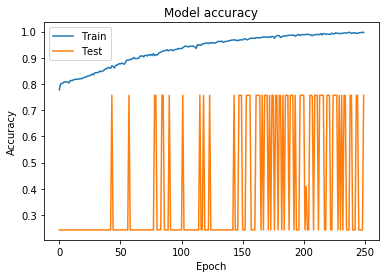

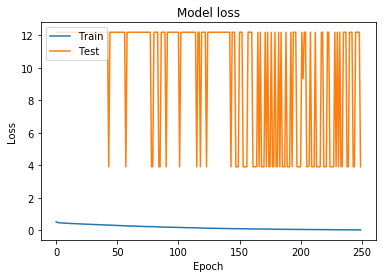

In [23]:
import matplotlib.pyplot as plt

history = validator.best_estimator_.model.history

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
